# Mean Shift Clustering

## Step 1: Environment

In [46]:
import numpy as np
import pandas as pd

from sklearn.cluster import  MeanShift, estimate_bandwidth

from sklearn import metrics
import matplotlib.pyplot as plt


from scipy.spatial.distance import cdist

import seaborn as sns
import plotly.express as pxp
import plotly.graph_objs as gph


## Step 2: Data Preparation

In [47]:
# !pwd

In [48]:
# Load input data
# X = np.loadtxt('../data/data_clustering.txt', delimiter=',')
x = pd.read_csv('../data/Emp-Attrition-Initial-Clean.csv', delimiter=',')
x = x.drop(columns=['Attrition'])
print(x)

      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41               0       1102           0                 1          2   
1      49               1        279           1                 8          1   
2      37               0       1373           1                 2          2   
3      33               1       1392           1                 3          4   
4      27               0        591           1                 2          1   
...   ...             ...        ...         ...               ...        ...   
1465   36               1        884           1                23          2   
1466   39               0        613           1                 6          1   
1467   27               0        155           1                 4          3   
1468   49               1       1023           0                 2          3   
1469   34               0        628           1                 8          3   

      EducationField  Envir

In [49]:
x.shape

(1470, 30)

In [50]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1102,0,1,2,0,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,0,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,0,1373,1,2,2,1,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,0,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,1,2,1,2,1,1,40,...,3,4,1,6,3,3,2,2,2,2


In [51]:
# Select attributes and convert to numpy
X = x.iloc[:, 3:5].values
X

array([[0, 1],
       [1, 8],
       [1, 2],
       ...,
       [1, 4],
       [0, 2],
       [1, 8]], shape=(1470, 2))

In [52]:
x.shape

(1470, 30)

## Step 3: Train and Implement the Model

Update the candidates for centroids to be the mean of the points within a given region (also called bandwidth). The overlapping candidates are eliminated to avoid duplicates. There is no need for pre-defined number of clusters.

In [53]:
# Bandwidth/radius is found automatically with
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=200)
bandwidth 

np.float64(3.128175054442272)

In [54]:
# Train mean-shift model with the data frame
msmodel = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msmodel.fit(X)

MeanShift(bandwidth=np.float64(3.128175054442272), bin_seeding=True)

In [55]:
# get the calculated values 
labels = msmodel.labels_
labels_unique = np.unique(labels)
labels_unique

array([0, 1, 2, 3, 4])

In [56]:
n_clusters_ = len(labels_unique)
n_clusters_

5

In [57]:
# See the clusters and cluster centres
cluster_centers = msmodel.cluster_centers_
cluster_centers

array([[ 0.74683544,  2.31487342],
       [ 0.73913043,  6.70022883],
       [ 0.73611111, 15.63194444],
       [ 0.76760563, 22.63380282],
       [ 0.72142857, 26.41428571]])

In [58]:
# Predict the cluster for all the samples for test
Y = msmodel.predict(X)
Y

array([0, 1, 0, ..., 0, 0, 1], shape=(1470,))

In [59]:
len(msmodel.labels_)

1470

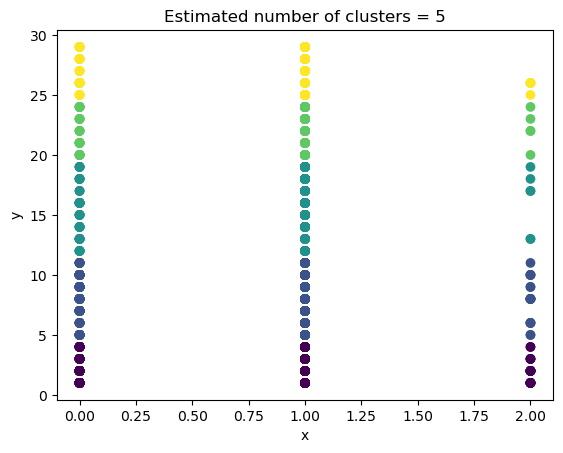

In [60]:
# Generate scatter plot for the training data
# colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426' if x == 2 else '#67c614', P))
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:,0], X[:,1], c=labels, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

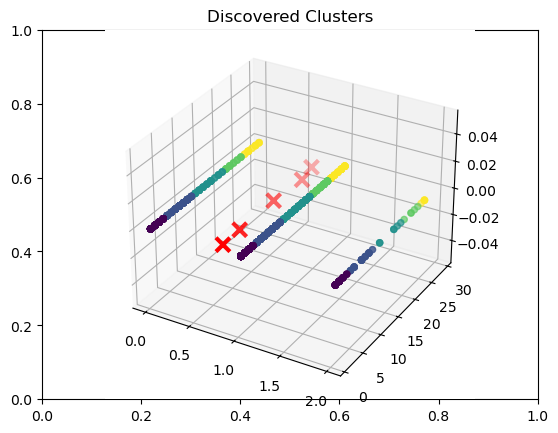

In [61]:
# Visualising the clusters in 3D
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
fig = plt.figure()
plt.title('Discovered Clusters')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],  marker='o', cmap='viridis', c=labels)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', 
           color='red', s=100, linewidth=3, zorder=10)
plt.show()

## Store the Model

In [62]:
# !pip install joblib


In [63]:
# For serialization and deserialization of data from/to file
# from sklearn.externals import joblib
import joblib
joblib.dump(msmodel, '../data/msmodel.pkl')

['../data/msmodel.pkl']